## Tutorial **Hacker Statistics**

* Determine how to simulate data
* Simlulate many many times
* Probability is approximately fraction of trials with the outcome of interest

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating Random Numbers

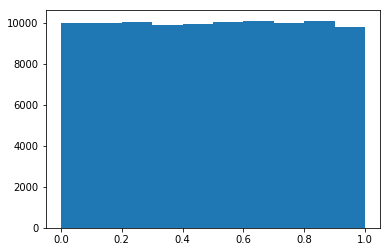

In [8]:
np.random.seed(42)  # use a seed to replicate results

random_numbers = np.empty(100000)  # initialize random numbers

# generate 100,000 random numbers
for i in range(100000):
    random_numbers[i] = np.random.random()
    
_ = plt.hist(random_numbers)

plt.show()

### Simulating 4 Coin Flips

In [4]:
np.random.seed(42)  

n_all_heads = 0  # Initialize number of 4-heads trials

for _ in range(10000):
    
    heads = np.random.random(size=4) < 0.5  # this function returns random number between 0 and 1
    n_heads = np.sum(heads)  # this works since true = 1
    if n_heads == 4:
        n_all_heads += 1  # increase the count
        
n_all_heads / 10000  

0.0618

### Bernoulli trials

* There are two options, success (true) and failure (false)
* Modified by a probability p
* "Success" just means that the Bernoulli trial evaluates to True

In [10]:
def perform_bernoulli_trials(n, p):
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes.
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

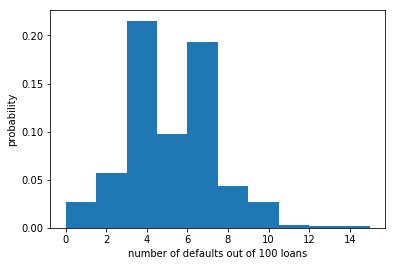

In [12]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

When there are integers better to plot ECDF.

In [2]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements
    """
    
    # Number of data points: n
    n = len(data)
    
    # sorted values
    x = np.sort(data)
    
    # evenly spaced datapoints with the maximum of 1
    y = np.arange(1, n+1) / n
    
    return x,y

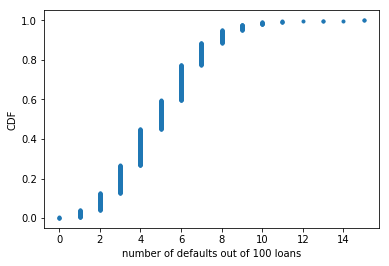

Probability of losing money = 0.022


In [15]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')  # we want points
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Binomial Distribution

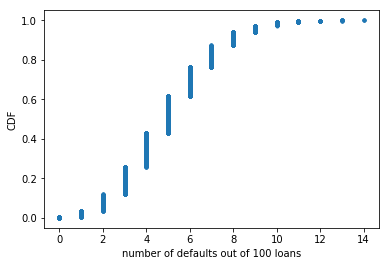

In [16]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker = '.', linestyle = 'none')  # we want points
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

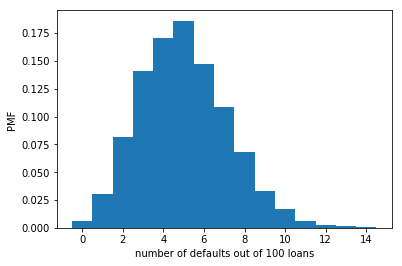

In [17]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed = True, bins = bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

### Poisson Distribution

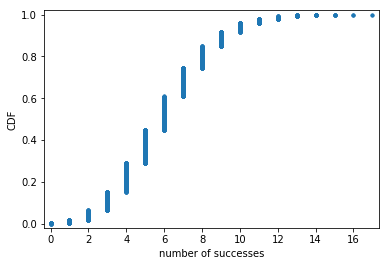

In [5]:
samples = np.random.poisson(6, size = 10000)

x, y = ecdf(samples)

_ = plt.plot(x,y, marker = '.', linestyle = 'none')
plt.margins(0.02)

_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')

plt.show()